In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.special import roots_chebyt
pi = np.double(np.pi)
interval_start = -2*pi
interval_end = pi
base_domain = np.arange(interval_start, interval_end, 0.01)

def function_given(x):
    m = 2
    k = 2
    global pi
    return np.sin(m * x) * np.sin(k * (x * x)/ pi)

function_given_values = []
for i in range(len(base_domain)):
    function_given_values.append(function_given(base_domain[i]))

def get_function_values(X):
    result = np.zeros(len(X), dtype=np.double)
    for i in range(len(X)):
        result[i] = function_given(X[i])
    return result

def get_abs_error(f1, f2, domain):
    max_error = -1
    for x in domain:
        max_error = max(max_error, abs(f1(x) - f2(x)))

def get_square_mean_error(f1, f2, domain):
    error_sum = 0
    for x in domain:
        error_sum += (f1(x) - f2(x))**2
    return np.sqrt(error_sum) / len(domain)

**Równomierna dystrybucja**

In [6]:
def even_domain(x_min, x_max, number_of_points):
    return np.linspace(x_min, x_max, number_of_points, dtype=np.double)

**Zera wielomianu Czebyszewa**

In [7]:
def get_chebyshev_zeros(n, start=None, stop=None):
    if start is None and stop is not None or start is not None and stop is None:
        raise ValueError("start and stop must be both None or both not None")
    chebyshev_zeroes = np.array(0, dtype=np.double)
    for k in range(n):
        cur_zero = np.cos((2*k+1)*np.pi/(2*n))
        if start is not None and stop is not None:
            cur_zero = (stop - start)/2 * cur_zero + (stop + start)/2
        chebyshev_zeroes = np.append(chebyshev_zeroes, cur_zero)
    return chebyshev_zeroes

**Interpolacja Lagrange'a**

In [23]:
def lagrange_interpolation(function, x, x_zeroes):
    def Lk(k, x):
        nonlocal n
        d = 1
        for i in range(n):
            if i != k:
                d *= (x - x_zeroes[i])
        m = 1
        for i in range(n):
            if i != k:
                m *= (x_zeroes[k] - x_zeroes[i])
        return d/m

    Pn = 0
    n = len(x_zeroes)
    '''print("NO WEŹ NO")
    print(x_zeroes)
    print(type(x_zeroes))
    print("END NO WEŹ NO")'''
    for k in range(n):
        Pn += Lk(k, x) * function(x_zeroes[k])
    return Pn


def interpolate_lagrange(function, domain, x_zeroes):
    result = []
    for i in range(len(domain)):
        result.append(lagrange_interpolation(function=function, x=domain[i], x_zeroes=x_zeroes))
    return result

print(lagrange_interpolation(np.sin, 15, even_domain(-10, 10, 10)))

4747.922116656016


**Interpolacja Newtona**

In [9]:
def newton_interpolation(function, x, x_zeroes):
    n = len(x_zeroes)
    def get_difference_quotient_table():
        nonlocal function
        nonlocal x_zeroes
        nonlocal n
        table = np.zeros((n,n), dtype=np.double)
        for i in range(n):
            table[i][0] = function(x_zeroes[i])
        for j in range(1, n):
            for i in range(n-j):
                table[i][j] = (table[i+1][j-1] - table[i][j-1])/(x_zeroes[i+j] - x_zeroes[i])
        return table
    difference_quotient_table = get_difference_quotient_table()
    Pn = function(x_zeroes[0])
    for k in range(k, n):
        cur_number = difference_quotient_table[0][k]
        for i in range(0, k):
            cur_number *= (x - x_zeroes[i])
        Pn +=  cur_number
    return Pn
print("ASDAS")

ASDAS


**Wizualizacja**

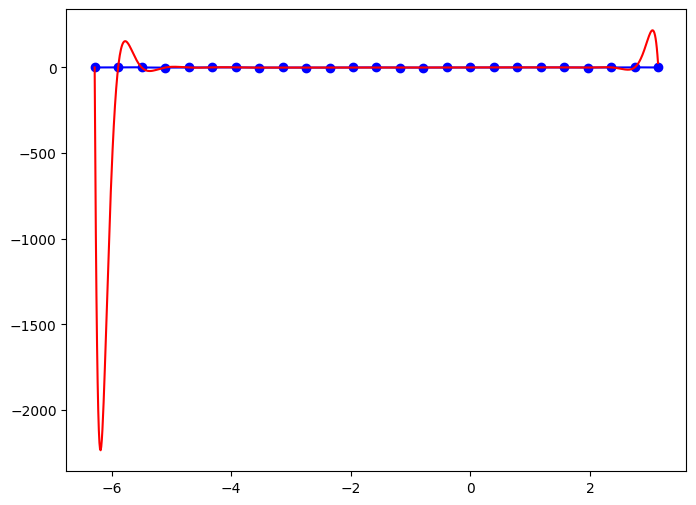

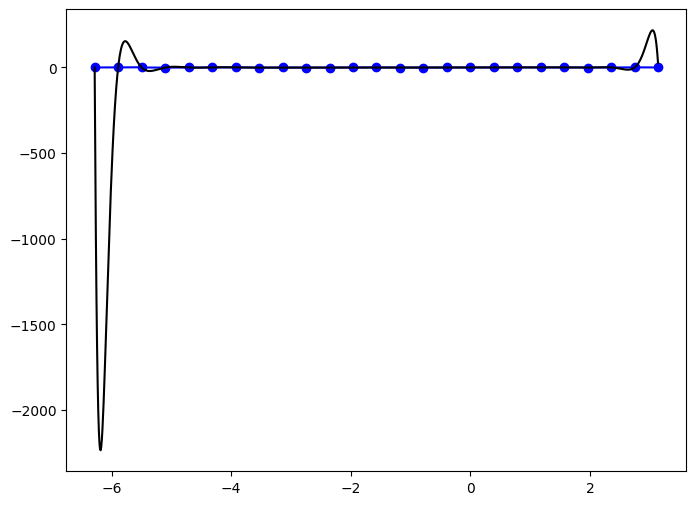

In [98]:
def visualise(domain=None, nodes_x=None, nodes_y=None, f_y=None, Pn_x=None, mode=None, x_size=8, y_size=6):
    '''
    :param domain: array of float64, of x coordinates of points to visualise
    :param nodes_x: array of x coordinates of nodes
    :param nodes_y: array of f(x) for each x in nodes_x
    :param f_y: array of f(x) for each x in domain
    :param Pn_x: array of Pn(x) for each x in domain
    :param mode: "lagrange" or "newton" or "impo"
    :param x_size: size of a figure in x axis
    :param y_size: size of a figure in y axis
    :return: None
    '''
    plt.figure(figsize=(x_size, y_size))
    if nodes_x is not None and nodes_y is not None:
        plt.scatter(nodes_x, nodes_y, label = "Węzły", color = "blue")

    if f_y is not None:
        plt.plot(domain, f_y, label = "Zadan funckcja", color = "blue")

    if mode == "lagrange":
        plt.plot(domain, Pn_x, label = "Interpolacja Lagrange'a", color = "red")
    elif mode == "impo":
        plt.plot(domain, Pn_x, label = "Lagrange'a z scipy", color = "red")
    elif mode == "newton":
        plt.plot(domain, Pn_x, label = "Interpolacja Newtona", color = "red")

def visualise_scipy_lagrange(number_of_nodes, domain, function):
    nodes_x = even_domain(x_min=interval_start, x_max=interval_end, number_of_points=number_of_nodes)
    nodes_y = []
    for i in range(len(nodes_x)):
        nodes_y.append(function(nodes_x[i]))
    scipy_lagrange = lagrange(nodes_x, nodes_y)
    scipy_lagrange_values = []
    for i in range(len(domain)):
        scipy_lagrange_values.append(scipy_lagrange(domain[i]))
    visualise(domain=base_domain, nodes_x=nodes_x, nodes_y=nodes_y, f_y=function_given_values, Pn_x=scipy_lagrange_values, mode="impo")

def visualise_own_lagrange(number_of_nodes, domain, function):
    nodes_x = even_domain(x_min=interval_start, x_max=interval_end, number_of_points=number_of_nodes)
    nodes_y = []
    for i in range(len(nodes_x)):
        nodes_y.append(function(nodes_x[i]))
    own_lagrange_values = interpolate_lagrange(function=function, domain=domain, x_zeroes=nodes_x)
    visualise(domain=base_domain, nodes_x=nodes_x, nodes_y=nodes_y, f_y=function_given_values, Pn_x=own_lagrange_values, mode="lagrange")

tmp = 25
visualise_scipy_lagrange(tmp, base_domain, function_given)
visualise_own_lagrange(tmp, base_domain, function_given)
#visualise(x_zeroes=even_domain(interval_start, interval_end, 3), function=function_given, interpolating_function=interpolate_lagrange, mode="lagrange")
#visualise(x_zeroes=even_domain(interval_start, interval_end, 10), function=function_given, interpolating_function=lagrange, mode="impo")


**Wykonanie ćwiczenia**

TypeError: object of type 'NoneType' has no len()

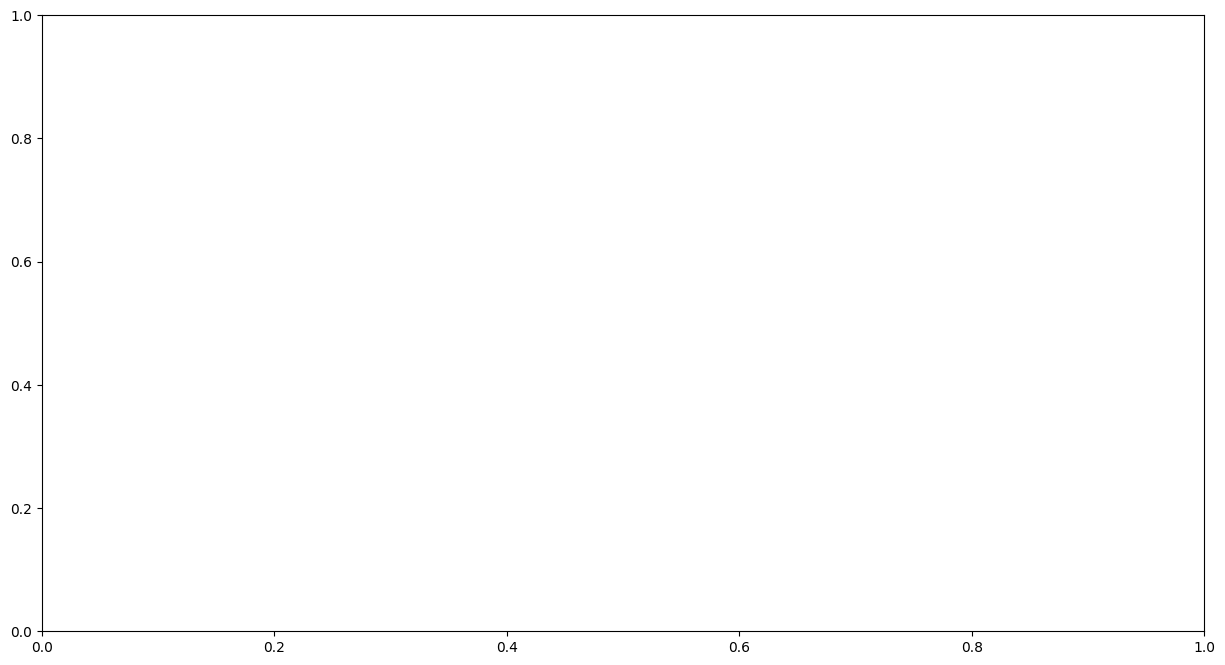

In [ ]:
'''def even_domain(x_min, x_max, number_of_points):
    return np.linspace(x_min, x_max, number_of_points, dtype=np.double)
def get_chebyshev_zeros(n, start=None, stop=None):
    if start is None and stop is not None or start is not None and stop is None:
        raise ValueError("start and stop must be both None or both not None")
    chebyshev_zeroes = np.array(0, dtype=np.double)
    for k in range(n):
        cur_zero = np.cos((2*k+1)*np.pi/(2*n))
        if start is not None and stop is not None:
            cur_zero = (stop - start)/2 * cur_zero + (stop + start)/2
        chebyshev_zeroes = np.append(chebyshev_zeroes, cur_zero)
    return chebyshev_zeroes'''

number_of_nodes = [3, 4, 5, 7, 10, 15, 20, 25]
even_nodes = []
chebyshev_nodes = []
for number in number_of_nodes:
    even_nodes.append(even_domain(x_min=interval_start, x_max=interval_end, number_of_points=number))
    chebyshev_nodes.append(get_chebyshev_zeros(start=interval_start, stop=interval_end, n=number))

#
print(even_nodes[0])
visualise(points=even_nodes[0],
          function=function_given,
          interpolating_function=interpolate_lagrange,
          x_min=interval_start,
          x_max=interval_end,
          mode="lagrange",
          x_size=15,
          y_size=8)


'''
Efektr rungego ma być dla +- 10 węzłów i ma byc między węzłami
'''